In [2]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.2 MB/s eta 0:00:00


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from gymnasium import Env, spaces, register, make

In [4]:
class RMEnv(Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None):

        self.P = {
            0: {
                0: [(0.9, 0, -0.04, False),(0.1, 1, -0.04, False)],
                1: [(0.8, 1, -0.04, False),(0.1, 4, -0.04, False),(0.1, 0, -0.04, False)],
                2: [(0.8, 4, -0.04, False),(0.1, 1, -0.04, False),(0.1, 0, -0.04, False)],
                3: [(0.9, 0, -0.04, False),(0.1, 4, -0.04, False)]

            },
            1: {
                0: [(0.8, 1, -0.04, False),(0.1, 0, -0.04, False),(0.1, 2, -0.04, False)],
                1: [(0.8, 2, -0.04, False),(0.2, 1, -0.04, False)],
                2: [(0.8, 1, -0.04, False),(0.1, 0, -0.04, False),(0.1, 2, -0.04, False)],
                3: [(0.8, 0, -0.04, False),(0.2, 1, -0.04, False)]

            },
            2: {
                0: [(0.8, 2, -0.04, False),(0.1, 3, 1, True),(0.1, 1, -0.04, False)],
                1: [(0.8, 3, 1, True),(0.1, 2, -0.04, False),(0.1, 6, -0.04, False)],
                2: [(0.8, 6, -0.04, False),(0.1, 1, -0.04, False),(0.1, 3, 1, True)],
                3: [(0.8, 1, -0.04, False),(0.1, 2, -0.04, False),(0.1, 6, -0.04, False)]

            },
            3: {
                0: [(1.0, 3, 0, True)],
                1: [(1.0, 3, 0, True)],
                2: [(1.0, 3, 0, True)],
                3: [(1.0, 3, 0, True)]

            },
            4: {
                0: [(0.8, 0, -0.04, False),(0.2, 4, -0.04, False)],
                1: [(0.8, 4, -0.04, False),(0.1, 0, -0.04, False),(0.1, 8, -0.04, False)],
                2: [(0.8, 8, -0.04, False),(0.2, 4, -0.04, False)],
                3: [(0.8, 4, -0.04, False),(0.1, 0, -0.04, False),(0.1, 8, -0.04, False)]

            },
            5: {
                0: [(0.0, 5, 0, False)],
                1: [(0.0, 5, 0, False)],
                2: [(0.0, 5, 0, False)],
                3: [(0.0, 5, 0, False)]

            },

            6: {
                0: [(0.8, 2, -0.04, False),(0.1, 7, -1, True),(0.1, 6, -0.04, False)],
                1: [(0.8, 7, -1, True),(0.1, 2, -0.04, False),(0.1, 10, -0.04, False)],
                2: [(0.8, 10, -0.04, False),(0.1, 7, -1, True),(0.1, 6, -0.04, False)],
                3: [(0.8, 6, -0.04, False),(0.1, 2, -0.04, False),(0.1, 10, -0.04, False)]

            },
            7: {
                0: [(1.0, 7, 0, True)],
                1: [(1.0, 7, 0, True)],
                2: [(1.0, 7, 0, True)],
                3: [(1.0, 7, 0, True)]

            },
            8: {
                0: [(0.8, 4, -0.04, False),(0.1, 9, -0.04, False),(0.1, 8, -0.04, False)],
                1: [(0.8, 9, -0.04, False),(0.1, 4, -0.04, False),(0.1, 8, -0.04, False)],
                2: [(0.9, 8, -0.04, False),(0.1, 9, -0.04, False)],
                3: [(0.9, 8, -0.04, False),(0.1, 4, -0.04, False)]

            },
            9: {
              0: [(0.8, 9, -0.04, False),(0.1, 8, -0.04, False),(0.1, 10, -0.04, False)],
              1: [(0.8, 10, -0.04, False),(0.2, 9, -0.04, False)],
              2: [(0.8, 9, -0.04, False),(0.1, 10, -0.04, False),(0.1, 8, -0.04, False)],
              3: [(0.8, 8, -0.04, False),(0.2, 9, -0.04, False)]

            },
            10: {
              0: [(0.8, 6, -0.04, False),(0.1, 11, -0.04, False),(0.1, 9, -0.04, False)],
              1: [(0.8, 11, -0.04, False),(0.1, 6, -0.04, False),(0.1, 10, -0.04, False)],
              2: [(0.8, 10, -0.04, False),(0.1, 11, -0.04, False),(0.1, 9, -0.04, False)],
              3: [(0.8, 9, -0.04, False),(0.1, 10, -0.04, False),(0.1, 6, -0.04, False)]

            },
            11: {
                0: [(0.8, 7, -1, True),(0.1, 11, -0.04, False),(0.1, 10, -0.04, False)],
                1: [(0.9, 11, -0.04, False),(0.1, 7, -1, True)],
                2: [(0.9, 11, -0.04, False),(0.1, 10, -0.04, False)],
                3: [(0.8, 10, -0.04, False),(0.1, 11, -0.04, False),(0.1, 7, -1, True)]

            },
        }
        self.size = 12 # The size of the 1D grid

       #We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        #We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(4)

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        self.window = None
        self.clock = None

    def _get_obs(self):

        return self._agent_location


    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._agent_location = 8
        self._target_location = 3
        self._dead_state = 7


        observation = self._get_obs()

        if self.render_mode == "human":
            self._render_frame()

        return observation


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, termination = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        prob,self._agent_location, reward, terminated = probabilities[index],next_states[index], rewards[index], termination[index]

        observation = self._get_obs()
        truncated = False

        # "current_state": prev_location,"action":action,"next_state": self._agent_location,"reward":reward,"done":terminated
        tansition_info={"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location,
                        "reward":reward,
                        "done":terminated}

        if self.render_mode == "human":
            self._render_frame()

        # Return the required 5-tuple
        return observation, reward, terminated,truncated,tansition_info

register(id='RMEnv', entry_point=RMEnv)

In [5]:
env1 = make('RMEnv', render_mode="rgb_array")

In [6]:
#function to decay the step size

def decayAlpha(initialValue, finalValue, maxSteps, decayType):
    alpha=initialValue
    alpha_l=[]
    if finalValue == 0:
        print("Error: Final value is zero.")
        return None
    if decayType=="linear":
        s_val=(initialValue-finalValue)/(maxSteps-1)
        for i in range(maxSteps):
            alpha_l.append(alpha)
            alpha=alpha-s_val
    if decayType=="exponential":
        s_val=(np.log(initialValue/finalValue))/maxSteps
        for i in range(maxSteps):
            alpha_l.append(alpha)
            alpha=alpha*(np.exp(-s_val))
        alpha_l[maxSteps-1]=finalValue
    return alpha_l



#decay greedy epsilon trajectory
def decay_epsilon_greedy_trajectory(env,seed,Q,maxsteps,Epsilon):
  e=0
  trajectory = []
  obs= env.reset(seed=seed)
  while e<maxsteps:
    E=Epsilon
    if np.random.random()>E:
      a=np.argmax(Q[obs])
    else:
      a=np.random.randint(env.action_space.n)
    obs, R, terminated, truncated, info=env.step(a)
    t = (info['current_state'], info['action'],  info['reward'], info['next_state'], info['done'])
    trajectory.append(t)
    e=e+1
  return trajectory



In [19]:
#actual value function
def valuef(env,pie,gamma):
  v=np.zeros(12)

  for s in range(12):
    if s not in [3, 5, 7]:
      a=pie[s]
      T=env.P[s][a]
      prob, s_n, r, termi = zip(*T)
      s_n=np.array(s_n)
      r=np.array(r)
      prob=np.array(prob)
      V=np.zeros(len(s_n))
      for i in range(len(s_n)):
        V[i]=v[s_n[i]]

      R=r+gamma*V
      R=np.array(R)
      v[s] = np.sum(prob * R)
  return v

#actual action value function
def Q_value(env,gamma,v):
  Q=np.zeros((12,4))
  for s in range(12):
    if s not in [3, 5, 7]:
      for a in range(4):
        T=env.P[s][a]
        prob, s_n, r, termi = zip(*T)
        s_n=np.array(s_n)
        r=np.array(r)
        prob=np.array(prob)
        V=np.zeros(len(s_n))
        for i in range(len(s_n)):
          V[i]=v[s_n[i]]
        R=r+gamma*V
        R=np.array(R)
        Q[s,a] = np.sum(prob * R)
  return Q


In [73]:
def getPolicySuccessRate(env, pi, maxEpisodes=100, maxSteps=200):
  suc=0
  for _ in range(maxEpisodes):
    s=env.reset(seed=55)
    for _ in range(maxSteps):
      a=pi[s]
      s, r, termi,_,_=env.step(a)
      if termi:
        if r==1:
          suc=suc+1
        break
  rate=100*(suc/maxEpisodes)
  return rate


In [74]:
#Monte Carlo control
def monteCarloControl(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, maxSteps,numEps,FV=True):
  Q=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  pie=np.zeros(env.observation_space.n)
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")
  p_r=np.zeros(numEps)
  j=0
  G=0
  for e in range(numEps):
      G=0
      alp=alpha[e]
      eps=epsilon[e]
      t= decay_epsilon_greedy_trajectory(env,seed,Q,maxSteps,epsilon[e])
      visited=np.full((env.observation_space.n,env.action_space.n), False, dtype=bool)
      for i in range(len(t)):
          s,a,r,s_n,d=t[i]
          if visited[s,a] and FV:
              continue
          else:
              visited[s,a]=True
          j=i
          while j<len(t):
              g=(gamma**(j-i))*(t[j][2])
              G=G+g
              j=j+1
          Q[s,a]=Q[s,a]+alp*(G-Q[s,a])
          V=np.max(Q,axis=1)
      Q_s[e]=Q
      V_s[e]=V
      pie=np.argmax(Q,axis=1)
      p_r[e]=getPolicySuccessRate(env1, pie, maxEpisodes=100, maxSteps=200)
  return Q,V,pie,Q_s,V_s,p_r


#action select
def action_select(s,Q,E):
  if np.random.random()>E:
    a=np.argmax(Q[s])
  else:
    a=np.random.randint(4)
  return a

#sarsa
def sarsa(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, numEps):
  Q=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  p_r=np.zeros(numEps)
  pie=np.zeros(env.observation_space.n)
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")

  for e in range(numEps):
      alp=alpha[e]
      eps=epsilon[e]
      s=env.reset(seed=seed)
      done=False
      a=action_select(s,Q,eps)
      while not done:
          s_n,r,done,_,_=env.step(a)
          a_n=action_select(s_n,Q,eps)
          td_target=r
          if not done:
              td_target=td_target+gamma*Q[s_n,a_n]
          td_error=td_target-Q[s,a]
          Q[s,a]=Q[s,a]+alp*td_error
          s=s_n
          a=a_n
          V=np.max(Q,axis=1)
      Q_s[e]=Q
      V_s[e]=V
      pie=np.argmax(Q,axis=1)
      p_r[e]=getPolicySuccessRate(env1, pie, maxEpisodes=100, maxSteps=200)
  return Q,V,pie,Q_s,V_s,p_r

#Q-learning
def Q_learning(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, numEps):
  Q=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  pie=np.zeros(env.observation_space.n)
  p_r=np.zeros(numEps)
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")

  for e in range(numEps):
      alp=alpha[e]
      eps=epsilon[e]
      s=env.reset(seed=seed)
      done=False
      while not done:
          a=action_select(s,Q,eps)
          s_n,r,done,_,_=env.step(a)
          td_target=r
          if not done:
              td_target=td_target+gamma*(np.max(Q[s_n]))
          td_error=td_target-Q[s,a]
          Q[s,a]=Q[s,a]+alp*td_error
          s=s_n
          V=np.max(Q,axis=1)
      Q_s[e]=Q
      V_s[e]=V
      pie=np.argmax(Q,axis=1)
      p_r[e]=getPolicySuccessRate(env1, pie, maxEpisodes=100, maxSteps=200)
  return Q,V,pie,Q_s,V_s,p_r

#double Q-learning
def doubleQ_learning(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, numEps):
  Q=Q1=Q2=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=Q_s1=Q_s2=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  pie=np.zeros(env.observation_space.n)
  p_r=np.zeros(numEps)
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")

  for e in range(numEps):
      alp=alpha[e]
      eps=epsilon[e]
      s=env.reset(seed=seed)
      done=False
      while not done:
          a=action_select(s,Q,eps)
          s_n,r,done,_,_=env.step(a)
          if np.random.randint(2):
            a_q1=np.argmax(Q1[s_n])
            td_target=r
            if not done:
                td_target=td_target+gamma*Q2[s_n,a_q1]
            td_error=td_target-Q1[s,a]
            Q1[s,a]=Q1[s,a]+alp*td_error
          else:
            a_q2=np.argmax(Q2[s_n])
            td_target=r
            if not done:
                td_target=td_target+gamma*Q1[s_n,a_q2]
            td_error=td_target-Q2[s,a]
            Q2[s,a]=Q2[s,a]+alp*td_error
          s=s_n
          Q=(Q1+Q2)/2
          V=np.max(Q,axis=1)
      Q_s1[e]=Q1
      Q_s2[e]=Q2
      Q_s=(Q_s1+Q_s2)/2
      V_s[e]=V
      pie=np.argmax(Q,axis=1)
      p_r[e]=getPolicySuccessRate(env1, pie, maxEpisodes=100, maxSteps=200)
  return Q,V,pie,Q_s,V_s,p_r

In [75]:
time_steps = np.arange(2000)
Seed=[64,40 ,70 ,42 ,52]

In [76]:
#running montecarlocontrol
m=np.zeros((2000,12))
m_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q1,V1,pie1,Q_s1,V_s1,p_r1=monteCarloControl(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05, maxSteps=100,numEps=2000,FV=True)

  m=m+V_s1
  m_q=m_q+Q_s1

m=m/5
m_q=m_q/5
m=np.transpose(m)
m_q=np.transpose(m_q,(1, 2, 0))

#actual Value function
v1=valuef(env1,pie1,0.99)
q1=Q_value(env1,0.99,v1)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


In [77]:
pie1

array([1, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 2])

In [78]:
#running sarsa
l=np.zeros((2000,12))
l_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q2,V2,pie2,Q_s2,V_s2,p_r2=sarsa(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000)

  l=l+V_s2
  l_q=l_q+Q_s2

l=l/5
l_q=l_q/5
l=np.transpose(l)
l_q=np.transpose(l_q,(1, 2, 0))

#actual Value function
v2=valuef(env1,pie2,0.99)
q2=Q_value(env1,0.99,v2)

In [79]:
pie2

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3])

In [80]:
#running Q learning
n=np.zeros((2000,12))
n_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q3,V3,pie3,Q_s3,V_s3,p_r3=Q_learning(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000)

  n=n+V_s3
  n_q=n_q+Q_s3

n=n/5
n_q=n_q/5
n=np.transpose(n)
n_q=np.transpose(n_q,(1, 2, 0))

#actual Value function
v3=valuef(env1,pie3,0.99)
q3=Q_value(env1,0.99,v2)

In [81]:
pie3

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3])

In [82]:
#running double Q learning
o=np.zeros((2000,12))
o_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q4,V4,pie4,Q_s4,V_s4,p_r4=doubleQ_learning(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000)

  o=o+V_s4
  o_q=o_q+Q_s4

o=o/5
o_q=o_q/5
o=np.transpose(o)
o_q=np.transpose(o_q,(1, 2, 0))

#actual Value function
v4=valuef(env1,pie4,0.99)
q4=Q_value(env1,0.99,v4)

In [83]:
pie4

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 3])

Value Function Plot

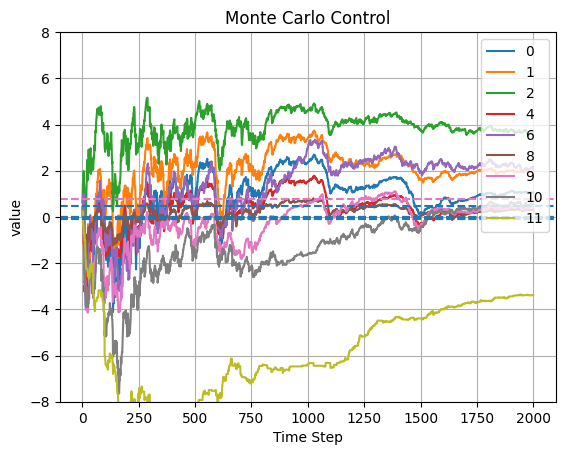

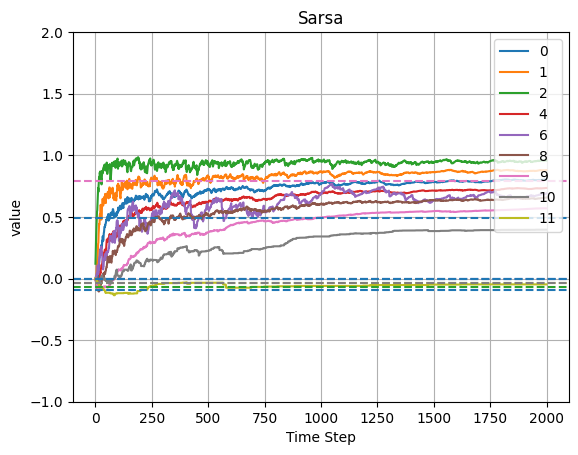

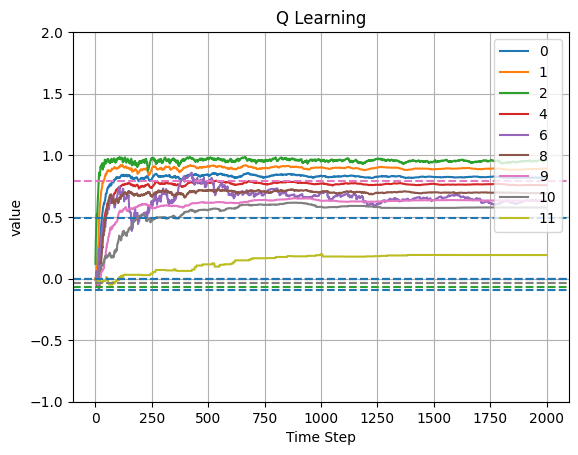

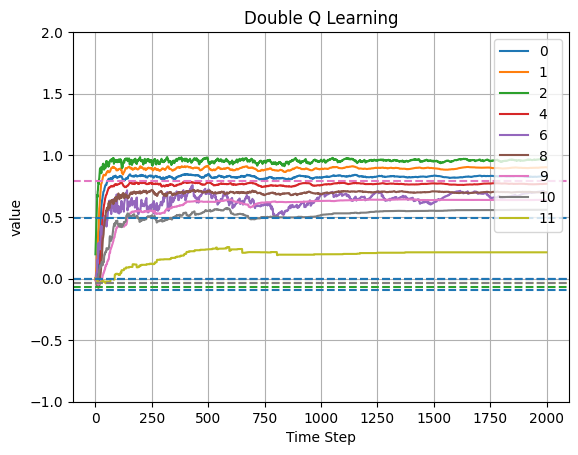

In [84]:
methods=["Monte Carlo Control","Sarsa","Q Learning","Double Q Learning"]
value=[m,l,n,o]
actual_values=[v1,v2,v3,v4]
for i in range(4):
  states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11]
  for state in states_to_plot:
      plt.plot(time_steps, value[i][state], label=str(state))

  for state, actual_v in zip(states_to_plot, actual_values[i]):
    plt.axhline(y=actual_v, color=plt.gca().lines[len(states_to_plot)-1-state].get_color(), linestyle='--')


  plt.title(methods[i])
  plt.xlabel('Time Step')
  plt.ylabel('value')
  plt.legend(loc='upper right')
  plt.grid(True)
  if methods[i]=="Monte Carlo Control":
    plt.ylim(-8, 8)
  else:
    plt.ylim(-1, 2)
  plt.show()

Action Value Function Plot

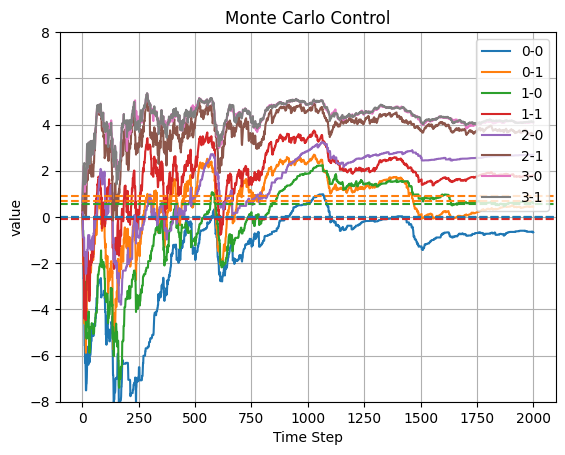

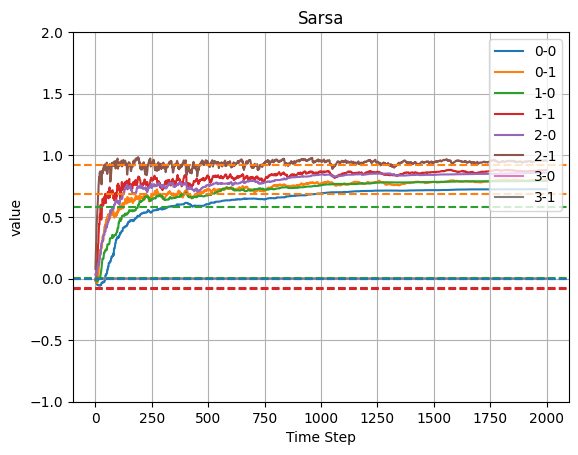

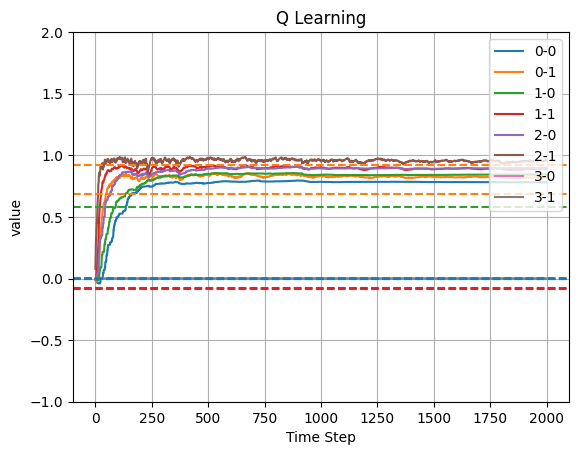

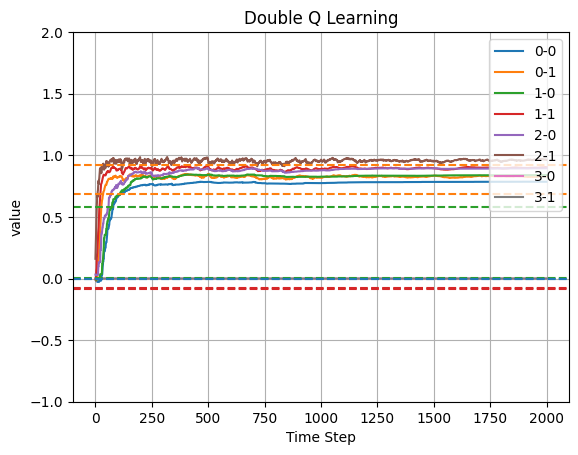

In [85]:
methods=["Monte Carlo Control","Sarsa","Q Learning","Double Q Learning"]
value=[m_q,l_q,n_q,o_q]
actual_values=[q1,q2,q3,q4]
for i in range(4):
  states_to_plot = [0,1,2,3] #mention the states whose Q value you want to plot
  action_to_plot=[0,1] #mention the action of the states whose Q value you want to plot
  for state in states_to_plot:
    for a in action_to_plot:
      plt.plot(time_steps, value[i][state][a], label=str(state)+"-"+str(a))
  aQf=actual_values[i]
  for state in states_to_plot:
      for a in action_to_plot:
          plt.axhline(y=aQf[state,a], color=plt.gca().lines[len(states_to_plot) - 1 - state].get_color(), linestyle='--')


  plt.title(methods[i])
  plt.xlabel('Time Step')
  plt.ylabel('value')
  plt.legend(loc='upper right')
  plt.grid(True)
  if methods[i]=="Monte Carlo Control":
    plt.ylim(-8, 8)
  else:
    plt.ylim(-1, 2)
  plt.show()

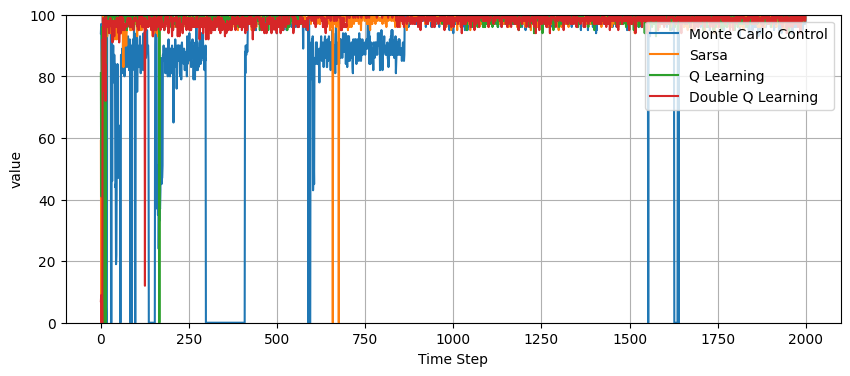

In [99]:
P_R=[p_r1,p_r2,p_r3,p_r4]
plt.figure(figsize=(10, 4))
for r in range(4):
      plt.plot(time_steps, P_R[r], label=str(methods[r]))

plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend(loc='upper right')
plt.grid(True)
plt.ylim(0, 100)
plt.show()


In [17]:
#sarsa lambda
def sarsaLambda(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, numEps,l,replaceTrace):
  Q=E=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")
  for e in range(numEps):
    alp=alpha[e]
    eps=epsilon[e]
    E=np.zeros((env.observation_space.n,env.action_space.n))
    s=env.reset(seed=seed)
    done=False
    a=action_select(s,Q,eps)
    while not done:
      s_n,r,done,trunc,info=env.step(a)
      a_n=action_select(s_n,Q,eps)
      td_target=r
      if not done:
        td_target=td_target+gamma*Q[s_n,a_n]
      td_error=td_target-Q[s,a]
      E[s,a]=E[s,a]+1
      if replaceTrace:
        np.clip(E,0,1)
      Q=Q+alp*td_error*E
      E=gamma*l*E
      s=s_n
      a=a_n
      V=np.max(Q,axis=1)
    Q_s[e]=Q
    V_s[e]=V
    pie=np.argmax(Q,axis=1)
  return Q,V,pie,Q_s,V_s

#Q-Lambda
def Qlambda(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, numEps,l,replaceTrace):
  Q=E=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")
  for e in range(numEps):
      alp=alpha[e]
      eps=epsilon[e]
      E=np.zeros((env.observation_space.n,env.action_space.n))
      s=env.reset(seed=seed)
      done=False
      a=action_select(s,Q,eps)
      while not done:
          s_n,r,done,_,_=env.step(a)
          a_n=action_select(s_n,Q,eps)
          if Q[s_n,a_n]==np.max(Q[s_n]):s_greedy=True
          else:s_greedy=False
          td_target=r
          if not done:
              td_target=td_target+gamma*(np.max(Q[s_n]))
          td_error=td_target-Q[s,a]
          if replaceTrace:E[s]=0
          E[s,a]=E[s,a]+1
          Q=Q+alp*td_error*E
          if s_greedy:
            E=gamma*l*E
          else:
            E=np.zeros((env.observation_space.n,env.action_space.n))
          s=s_n
          a=a_n
          V=np.max(Q,axis=1)
      Q_s[e]=Q
      V_s[e]=V
      pie=np.argmax(Q,axis=1)
  return Q,V,pie,Q_s,V_s

#get visited states and actions taken
def vistedstates(T):
  p=0
  S=[]
  for s in range(len(T)):
    for a in range(len(T[s])):
      p=np.linalg.norm(T[s,a])
      if p!=0:
        S.append(s)
        break
  return S
def Takenaction(s,T):
  A=[]
  for a in range(4):
    p=np.linalg.norm(T[s,a])
    if p!=0:
      A.append(a)
  return A

#Dyna-Q
def dyna_Q(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, noPlanning, numEps):
  Q=E=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  T=np.zeros(((env.observation_space.n,env.action_space.n,env.observation_space.n)))
  R=np.zeros(((env.observation_space.n,env.action_space.n,env.observation_space.n)))
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")
  for e in range(numEps):
      alp=alpha[e]
      eps=epsilon[e]
      s=env.reset(seed=seed)
      done=False
      while not done:
        a=action_select(s,Q,eps)
        s_n,r,done,_,_=env.step(a)
        T[s,a,s_n]=T[s,a,s_n]+1
        rdiff=r-R[s,a,s_n]
        R[s,a,s_n]=R[s,a,s_n]+rdiff/T[s,a,s_n]
        td_target=r
        if not done:
            td_target=td_target+gamma*(np.max(Q[s_n]))
        td_error=td_target-Q[s,a]
        Q[s,a]=Q[s,a]+alp*td_error
        s_b=s_n
        for _ in range(noPlanning):
          if np.sum(Q)==0:break
          s_v=vistedstates(T)
          s=random.choice(s_v)
          a_t=Takenaction(s,T)
          a=random.choice(a_t)
          prob_s_n=T[s,a]/np.sum(T[s,a])
          s_n=random.choices(np.arange(12), prob_s_n, k=1)
          r=R[s,a,s_n]
          td_target=r+gamma*(np.max(Q[s_n]))
          td_error=td_target-Q[s,a]
          Q[s,a]=Q[s,a]+alp*td_error
        s=s_b
        V=np.max(Q,axis=1)
      Q_s[e]=Q
      V_s[e]=V
      pie=np.argmax(Q,axis=1)
  return Q,V,pie,Q_s,V_s

#Trajectory Smapling
def trajectorySampling(env,seed,gamma,alpha_i, alpha_f,epsilon_i,epsilon_f, maxTrajectory, numEps):
  Q=np.zeros((env.observation_space.n,env.action_space.n))
  Q_s=np.zeros(((numEps,env.observation_space.n,env.action_space.n)))
  V=np.zeros(env.observation_space.n)
  V_s=np.zeros((numEps,env.observation_space.n))
  T=np.zeros(((env.observation_space.n,env.action_space.n,env.observation_space.n)))
  R=np.zeros(((env.observation_space.n,env.action_space.n,env.observation_space.n)))
  alpha=decayAlpha(alpha_i, alpha_f, numEps, "exponential")
  epsilon=decayAlpha(epsilon_i, epsilon_f, numEps, "linear")
  for e in range(numEps):
    alp=alpha[e]
    eps=epsilon[e]
    E=0
    s=env.reset(seed=seed)
    done=False
    while not done:
        a=action_select(s,Q,eps)
        s_n,r,done,_,_=env.step(a)
        T[s,a,s_n]=T[s,a,s_n]+1
        rdiff=r-R[s,a,s_n]
        R[s,a,s_n]+=rdiff/T[s,a,s_n]
        td_target=r
        if not done:
            td_target=td_target+gamma*(np.max(Q[s_n]))
        td_error=td_target-Q[s,a]
        Q[s,a]=Q[s,a]+alp*td_error
        s_backup=s_n
        for _ in range(maxTrajectory):
          if np.sum(Q)==0:break
          a=action_select(s,Q,eps)
          if not np.sum(T[s,a]):break
          prob_s_n=T[s,a]/np.sum(T[s,a])
          prob_s_n=prob_s_n.flatten()
          s_n=random.choices(np.arange(12), prob_s_n, k=1)
          if T[s,a,s_n]==0:break
          r=R[s,a,s_n]
          td_target=r+gamma*(np.max(Q[s_n]))
          td_error=td_target-Q[s,a]
          Q[s,a]=Q[s,a]+alp*td_error
          s=s_n
        s=s_backup
        V=np.max(Q,axis=1)
    Q_s[e]=Q
    V_s[e]=V
    pie=np.argmax(Q,axis=1)
  return Q,V,pie,Q_s,V_s


In [37]:
#running sarsa lambda
Seed=[64,40 ,70 ,42 ,52]
h=np.zeros((2000,12))
h_q=np.zeros(((2000,12,4)))
i=np.zeros((2000,12))
i_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q5,V5,pie5,Q_s5,V_s5=sarsaLambda(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000,l=0.3,replaceTrace=True)
  Q6,V6,pie6,Q_s6,V_s6=sarsaLambda(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000,l=0.3,replaceTrace=False)

  h=h+V_s5
  h_q=h_q+Q_s5
  i=i+V_s6
  i_q=i_q+Q_s6

h=h/5
h_q=h_q/5
h=np.transpose(h)
h_q=np.transpose(h_q,(1, 2, 0))

i=i/5
i_q=i_q/5
i=np.transpose(i)
i_q=np.transpose(i_q,(1, 2, 0))

#actual Value function
v5=valuef(env1,pie5,0.99)
q5=Q_value(env1,0.99,v5)

v6=valuef(env1,pie6,0.99)
q6=Q_value(env1,0.99,v6)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


In [88]:
pie5

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3])

In [89]:
pie6

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3])

In [22]:
#running Q lambda
Seed=[64,40 ,70 ,42 ,52]
j=np.zeros((2000,12))
j_q=np.zeros(((2000,12,4)))
k=np.zeros((2000,12))
k_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q7,V7,pie7,Q_s7,V_s7=Qlambda(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000,l=0.3,replaceTrace=True)
  Q8,V8,pie8,Q_s8,V_s8=Qlambda(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,numEps=2000,l=0.3,replaceTrace=False)

  j=j+V_s7
  j_q=j_q+Q_s7
  k=k+V_s8
  k_q=k_q+Q_s8

j=j/5
j_q=j_q/5
j=np.transpose(j)
j_q=np.transpose(j_q,(1, 2, 0))

k=k/5
k_q=k_q/5
k=np.transpose(k)
k_q=np.transpose(k_q,(1, 2, 0))

#actual Value function
v7=valuef(env1,pie7,0.99)
q7=Q_value(env1,0.99,v7)

v8=valuef(env1,pie8,0.99)
q8=Q_value(env1,0.99,v8)

/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


In [90]:
pie7

array([1, 1, 1, 0, 0, 0, 3, 0, 0, 3, 3, 3])

In [92]:
pie8

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3])

In [94]:
#running dynamic Q
Seed=[64,40 ,70 ,42 ,52]
a=np.zeros((2000,12))
a_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q9,V9,pie9,Q_s9,V_s9=dyna_Q(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,noPlanning=15,numEps=2000)

  a=a+V_s9
  a_q=a_q+Q_s9

a=a/5
a_q=a_q/5
a=np.transpose(a)
a_q=np.transpose(a_q,(1, 2, 0))

#actual Value function
v9=valuef(env1,pie9,0.99)
q9=Q_value(env1,0.99,v9)

<ipython-input-17-ed0d8e3a280b>:132: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s,a]=Q[s,a]+alp*td_error
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


In [95]:
pie9

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 2])

In [25]:
#running Trajectory Sampling
Seed=[64,40 ,70 ,42 ,52]
b=np.zeros((2000,12))
b_q=np.zeros(((2000,12,4)))

for s in Seed:
  Q10,V10,pie10,Q_s10,V_s10=trajectorySampling(env=env1,seed=s,gamma=0.99,alpha_i=0.2, alpha_f=0.02,epsilon_i=0.3,epsilon_f=0.05,maxTrajectory=15,numEps=2000)

  b=b+V_s10
  b_q=b_q+Q_s10

b=b/5
b_q=b_q/5
b=np.transpose(b)
b_q=np.transpose(b_q,(1, 2, 0))

#actual Value function
v10=valuef(env1,pie10,0.99)
q10=Q_value(env1,0.99,v10)

<ipython-input-17-ed0d8e3a280b>:179: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Q[s,a]=Q[s,a]+alp*td_error
/usr/local/lib/python3.10/dist-packages/gymnasium/core.py:311: UserWarning: WARN: env.P to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.P` for environment variables or `env.get_wrapper_attr('P')` that will search the reminding wrappers.
  logger.warn(


In [93]:
pie10

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 3, 3, 3])

Value Function Plot

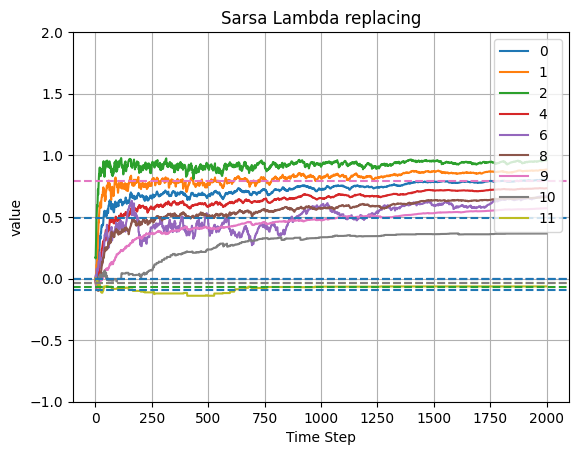

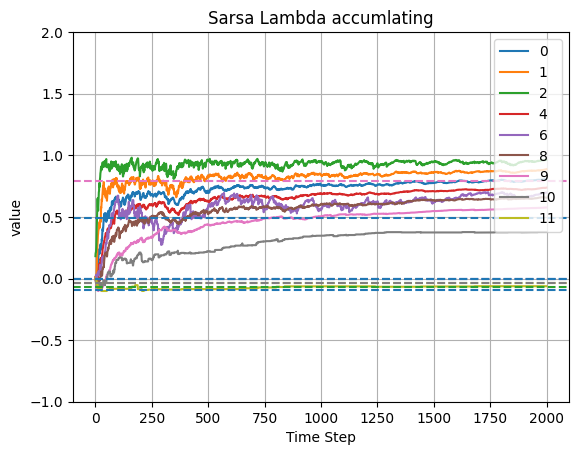

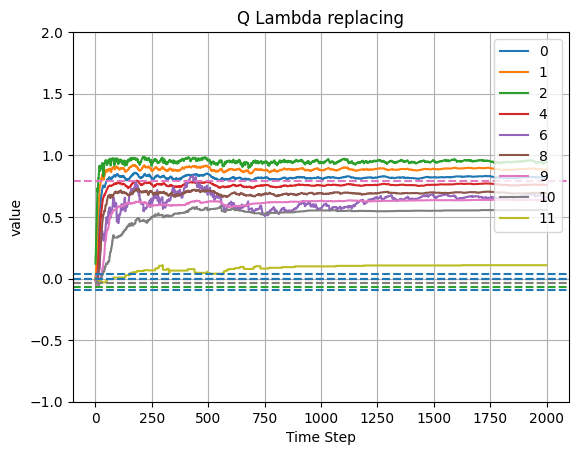

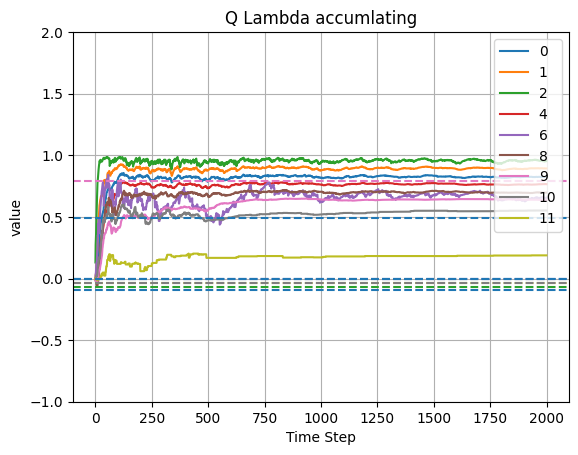

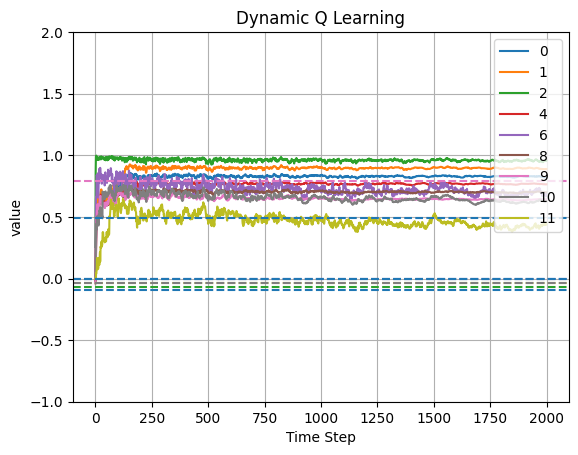

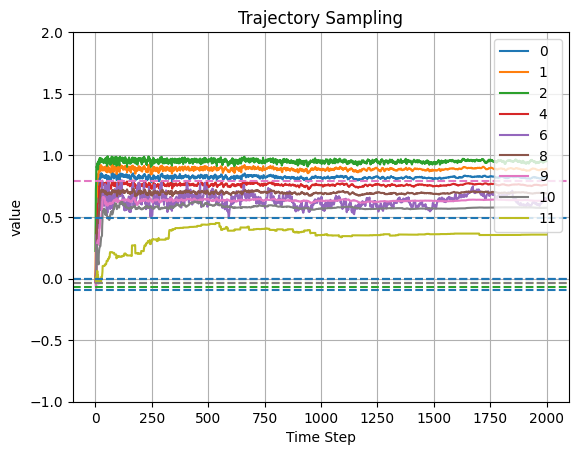

In [40]:
methods=["Sarsa Lambda replacing","Sarsa Lambda accumlating","Q Lambda replacing","Q Lambda accumlating","Dynamic Q Learning","Trajectory Sampling"]
value=[h,i,j,k,a,b]
actual_values=[v5,v6,v7,v8,v9,v10]
for z in range(6):
  states_to_plot = [0, 1, 2, 4, 6, 8, 9, 10, 11]
  for state in states_to_plot:
    plt.plot(time_steps, value[z][state], label=str(state))

  for state, actual_v in zip(states_to_plot, actual_values[z]):
    plt.axhline(y=actual_v, color=plt.gca().lines[len(states_to_plot)-1-state].get_color(), linestyle='--')


  plt.title(methods[z])
  plt.xlabel('Time Step')
  plt.ylabel('value')
  plt.legend(loc='upper right')
  plt.grid(True)
  if methods[z]=="Monte Carlo Control":
    plt.ylim(-8, 8)
  else:
    plt.ylim(-1, 2)
  plt.show()

Action Value Function Plot

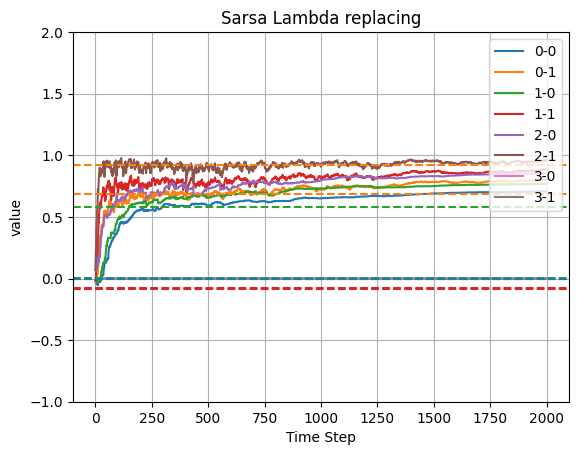

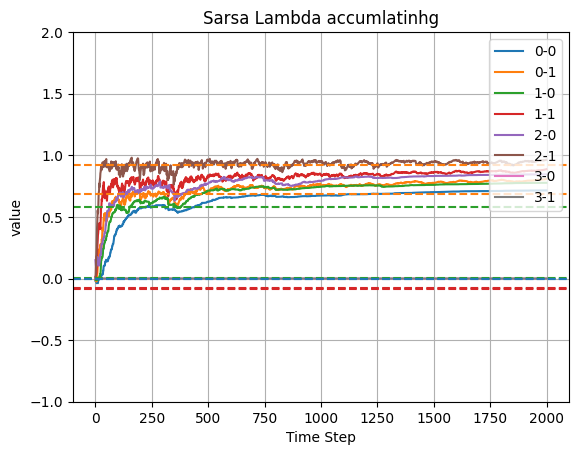

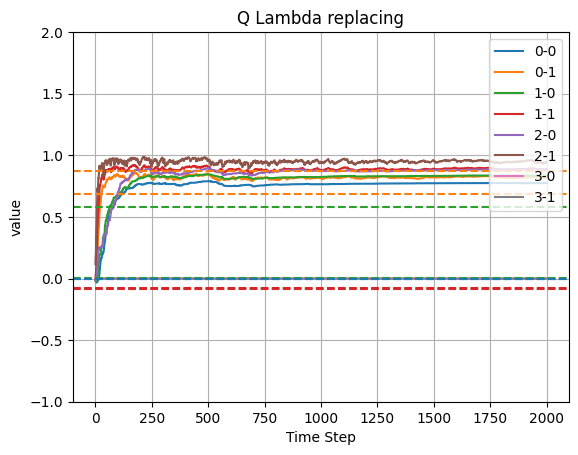

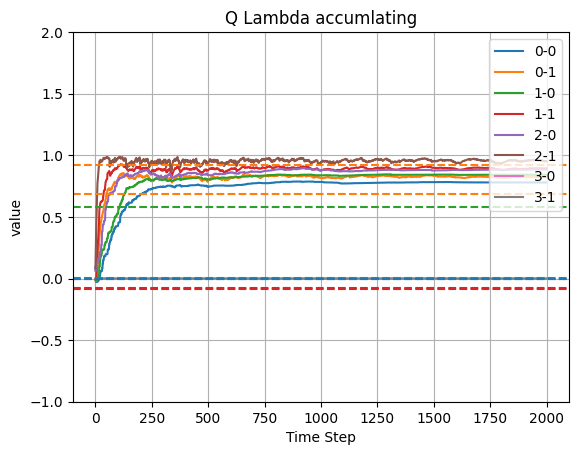

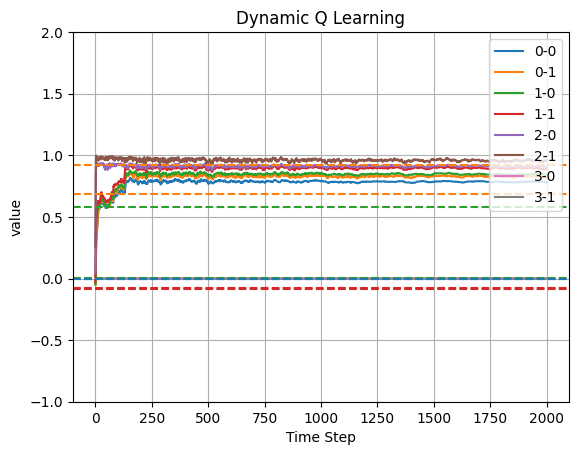

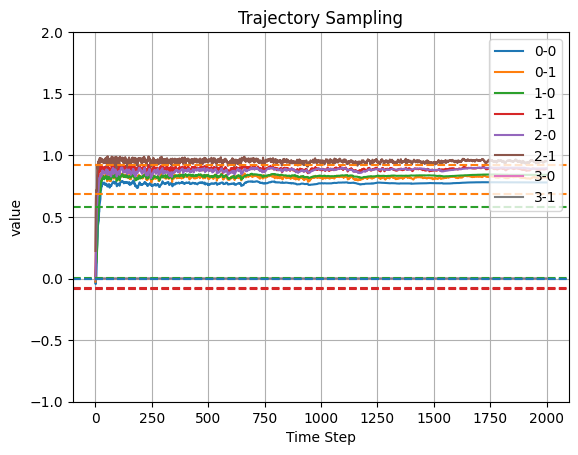

In [41]:
methods=["Sarsa Lambda replacing","Sarsa Lambda accumlatinhg","Q Lambda replacing","Q Lambda accumlating","Dynamic Q Learning","Trajectory Sampling"]
value=[h_q,i_q,j_q,k_q,a_q,b_q]
actual_values=[q5,q6,q7,q8,q9,q10]
for i in range(6):
  states_to_plot = [0,1,2,3] #mention the states whose Q value you want to plot
  action_to_plot=[0,1] #mention the action of the states whose Q value you want to plot
  for state in states_to_plot:
    for a in action_to_plot:
      plt.plot(time_steps, value[i][state][a], label=str(state)+"-"+str(a))
  aQf=actual_values[i]
  for state in states_to_plot:
      for a in action_to_plot:
          plt.axhline(y=aQf[state,a], color=plt.gca().lines[len(states_to_plot) - 1 - state].get_color(), linestyle='--')


  plt.title(methods[i])
  plt.xlabel('Time Step')
  plt.ylabel('value')
  plt.legend(loc='upper right')
  plt.grid(True)
  if methods[i]=="Monte Carlo Control":
    plt.ylim(-8, 8)
  else:
    plt.ylim(-1, 2)
  plt.show()